Taken from website:-
https://ourworldindata.org/coronavirus-source-data

Import libraries

In [422]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Read files

In [423]:
# load datasets
train = pd.read_csv('/content/drive/MyDrive/owid-covid-data.csv')
train

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,new_vaccinations_smoothed_per_million,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
0,AFG,Asia,Afghanistan,2020-02-24,1.0,1.0,NaN,NaN,NaN,NaN,0.026,0.026,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
1,AFG,Asia,Afghanistan,2020-02-25,1.0,0.0,NaN,NaN,NaN,NaN,0.026,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
2,AFG,Asia,Afghanistan,2020-02-26,1.0,0.0,NaN,NaN,NaN,NaN,0.026,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
3,AFG,Asia,Afghanistan,2020-02-27,1.0,0.0,NaN,NaN,NaN,NaN,0.026,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
4,AFG,Asia,Afghanistan,2020-02-28,1.0,0.0,NaN,NaN,NaN,NaN,0.026,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66962,ZWE,Africa,Zimbabwe,2021-02-01,33548.0,160.0,271.714,1234.0,17.0,22.714,2257.160,10.765,18.281,83.025,1.144,1.528,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2433.0,320693.0,21.577,0.164,3046.0,0.205,0.089,11.2,tests performed,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,84.26,14862927.0,42.729,19.6,2.822,1.882,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.535
66963,ZWE,Africa,Zimbabwe,2021-02-02,33814.0,266.0,258.571,1254.0,20.0,21.571,2275.057,17.897,17.397,84.371,1.346,1.451,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4160.0,324853.0,21.857,0.280,3203.0,0.216,0.081,12.4,tests performed,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14862927.0,42.729,19.6,2.822,1.882,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.535
66964,ZWE,Africa,Zimbabwe,2021-02-03,33964.0,150.0,237.143,1269.0,15.0,21.000,2285.149,10.092,15.955,85.380,1.009,1.413,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2829.0,327682.0,22.047,0.190,3084.0,0.207,0.077,13.0,tests performed,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14862927.0,42.729,19.6,2.822,1.882,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.535
66965,ZWE,Africa,Zimbabwe,2021-02-04,34171.0,207.0,217.857,128

In [424]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66967 entries, 0 to 66966
Data columns (total 59 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   iso_code                               63993 non-null  object 
 1   continent                              63612 non-null  object 
 2   location                               66967 non-null  object 
 3   date                                   66967 non-null  object 
 4   total_cases                            66356 non-null  float64
 5   new_cases                              66354 non-null  float64
 6   new_cases_smoothed                     65353 non-null  float64
 7   total_deaths                           57530 non-null  float64
 8   new_deaths                             57688 non-null  float64
 9   new_deaths_smoothed                    65353 non-null  float64
 10  total_cases_per_million                63387 non-null  float64
 11  ne

Get country's dataframe

In [425]:
country = "United Kingdom"

include_uk = train[train['location'].values == country]
exclude_uk = train[train['location'].values != country]
include_uk

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,new_vaccinations_smoothed_per_million,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
63091,GBR,Europe,United Kingdom,2020-01-31,2.0,2.0,NaN,NaN,NaN,NaN,0.029,0.029,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,67886004.0,272.898,40.8,18.517,12.527,39753.244,0.2,122.137,4.28,20.0,24.7,NaN,2.54,81.32,0.922
63092,GBR,Europe,United Kingdom,2020-02-01,2.0,0.0,NaN,NaN,NaN,NaN,0.029,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,67886004.0,272.898,40.8,18.517,12.527,39753.244,0.2,122.137,4.28,20.0,24.7,NaN,2.54,81.32,0.922
63093,GBR,Europe,United Kingdom,2020-02-02,2.0,0.0,NaN,NaN,NaN,NaN,0.029,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.11,67886004.0,272.898,40.8,18.517,12.527,39753.244,0.2,122.137,4.28,20.0,24.7,NaN,2.54,81.32,0.922
63094,GBR,Europe,United Kingdom,2020-02-03,8.0,6.0,NaN,NaN,NaN,NaN,0.118,0.088,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.11,67886004.0,272.898,40.8,18.517,12.527,39753.244,0.2,122.137,4.28,20.0,24.7,NaN,2.54,81.32,0.922
63095,GBR,Europe,United Kingdom,2020-02-04,8.0,0.0,NaN,NaN,NaN,NaN,0.118,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.11,67886004.0,272.898,40.8,18.517,12.527,39753.244,0.2,122.137,4.28,20.0,24.7,NaN,2.54,81.32,0.922
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63458,GBR,Europe,United Kingdom,2021-02-01,3846851.0,18668.0,23821.429,106774.0,407.0,1150.143,56666.334,274.990,350.903,1572.843,5.995,16.942,NaN,3726.0,54.886,32890.0,484.489,NaN,NaN,NaN,NaN,643204.0,71011933.0,1046.047,9.475,655567.0,9.657,0.036,27.5,tests performed,10143511.0,9646715.0,496796.0,352935.0,402534.0,14.94,14.21,0.73,5930.0,NaN,67886004.0,272.898,40.8,18.517,12.527,39753.244,0.2,122.137,4.28,20.0,24.7,NaN,2.54,81.32,0.922
63459,GBR,Europe,United Kingdom,2021-02-02,3863757.0,16906.0,23355.571,108225.0,1451.0,1123.714,56915.369,249.035,344.041,1594.217,21.374,16.553,NaN,3638.0,53.590,31670.0,466.517,NaN,NaN,NaN,NaN,606382.0,71642534.0,1055.336,8.932,657452.0,9.685,0.036,28.1,tests performed,10520433.0,10021471.0,498962.0,376922.0,411699.0,15.50,14.76,0.73,6065.0,NaN,67886004.0,272.898,40.8,18.517,12.527,39753.244,0.2,122.137,4.28,20.0,24.7,NaN,2.54,81.32,0.922
63460,GBR,Europe,United Kingdom,2021-02-03,3882972.0,19215.0,22476.429,109547.0,1322.0,1066.000,57198.418,283.048,331.091,1613.691,19.474,15.703,NaN,3625.0,53.398,NaN,NaN,NaN,NaN,NaN,NaN

Create new dataframe

In [426]:
uk_newcase = pd.DataFrame({'date':include_uk.date , 'new_cases': include_uk.new_cases})
uk_newcase

,date,new_cases
63091,2020-01-31,2.0
63092,2020-02-01,0.0
63093,2020-02-02,0.0
63094,2020-02-03,6.0
63095,2020-02-04,0.0
...,...,...
63458,2021-02-01,18668.0
63459,2021-02-02,16906.0
63460,2021-02-03,19215.0
63461,2021-02-04,20734.0


Time stamp

In [427]:
# to explicitly convert the date column to type DATETIME
uk_newcase['date'] = pd.to_datetime(uk_newcase['date'])
uk_newcase = uk_newcase.set_index('date')
uk_newcase

,new_cases
date,
2020-01-31,2.0
2020-02-01,0.0
2020-02-02,0.0
2020-02-03,6.0
2020-02-04,0.0
...,...
2021-02-01,18668.0
2021-02-02,16906.0
2021-02-03,19215.0


Graph time series

Text(0, 0.5, 'new cases')

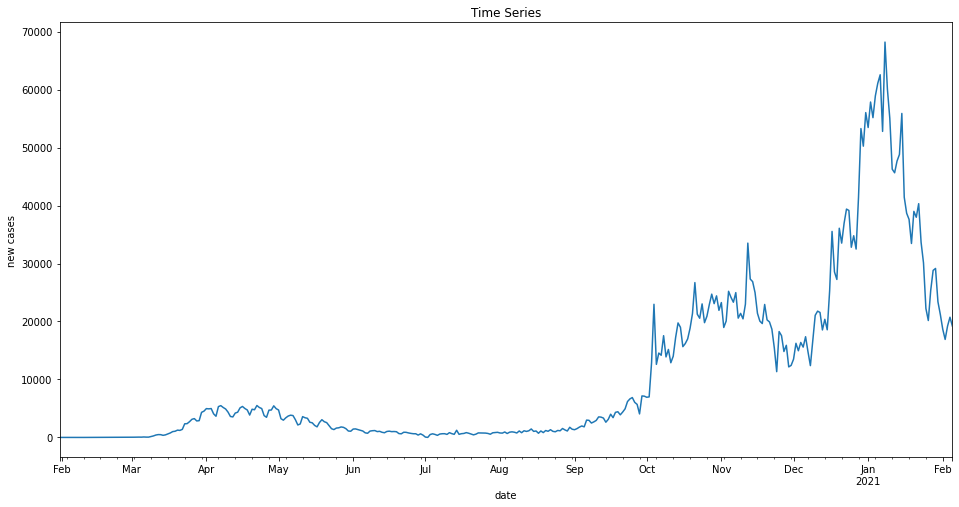

In [428]:
uk_newcase['new_cases'].plot(figsize=(16, 8))
plt.title('Time Series') 
plt.xlabel("date") 
plt.ylabel("new cases")

Lag plot

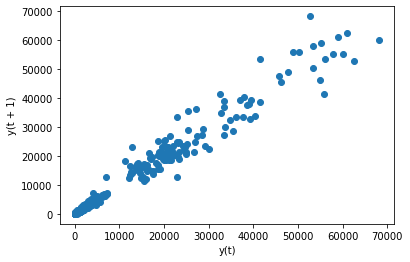

In [429]:
from pandas.plotting import lag_plot

lag_plot(uk_newcase)
plt.show()

Correlation matrix

In [430]:
from pandas import DataFrame
from pandas import concat

values = DataFrame(uk_newcase.values)
dataframe = concat([values.shift(1), values], axis=1)
dataframe.columns = ['t-1', 't+1']
result = dataframe.corr()
print(result)

          t-1       t+1
t-1  1.000000  0.983096
t+1  0.983096  1.000000


Autocorrelation plot

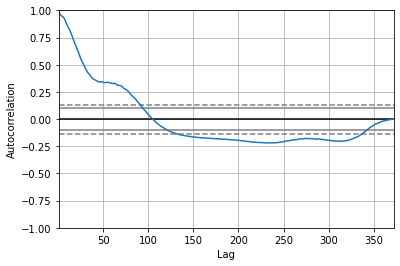

In [431]:
from pandas.plotting import autocorrelation_plot

autocorrelation_plot(uk_newcase)
plt.show()

Plot acf

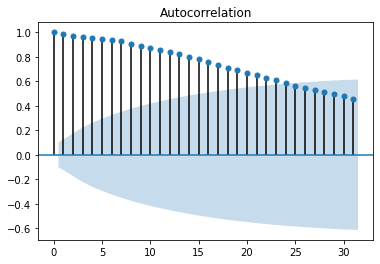

In [432]:
from statsmodels.graphics.tsaplots import plot_acf

plot_acf(uk_newcase, lags=31) #only 31 for readibility
plt.show()

Walk forward validation

Test MSE: 30623624.583


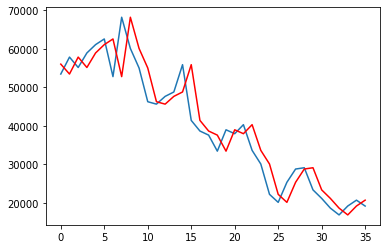

In [433]:
from sklearn.metrics import mean_squared_error

# create lagged dataset
values = DataFrame(uk_newcase.values)
dataframe = concat([values.shift(1), values], axis=1)
dataframe.columns = ['t-1', 't+1']
# split into train and test sets
X = dataframe.values
train, val = X[1:len(X)-36], X[len(X)-36:]
X_train, y_train = train[:,0], train[:,1]
X_val, y_val = val[:,0], val[:,1]

# persistence model
def model_persistence(x):
	return x

# walk-forward validation
predictions = list()
for x in X_val:
	yhat = model_persistence(x)
	predictions.append(yhat)
test_score = mean_squared_error(y_val, predictions)
print('Test MSE: %.3f' % test_score)
# plot predictions vs expected
plt.plot(y_val)
plt.plot(predictions, color='red')
plt.show()

AutoRegression

In [434]:
!pip install statsmodels --upgrade

Requirement already up-to-date: statsmodels in /usr/local/lib/python3.6/dist-packages (0.12.2)


Coefficients: [ 5.73348518e+01  7.42837663e-01  4.69672542e-04  1.08289550e-01
 -1.32745904e-01  1.78502135e-01  1.56590398e-01  1.39205340e-01
 -6.00940211e-02  3.68625102e-02 -8.88997555e-02  1.45399829e-01
 -1.31852957e-01  2.94229821e-02  4.80201769e-02  2.69468810e-02
 -9.10384093e-02 -3.77976525e-02 -6.75104140e-02  8.38032574e-02
 -7.69223126e-02 -9.02521631e-02  2.09148246e-01 -3.04920728e-01
  1.52343072e-01 -2.71251380e-02 -8.86154217e-02  3.51765743e-02
  1.29032707e-01 -1.77940378e-01 -1.23753202e-01  1.17376462e-01
  8.68001280e-02 -2.56724318e-02  1.95054465e-02  1.62236954e-01
 -5.29524500e-02]
predicted=51800.332018, expected=53458.000000
predicted=48881.194652, expected=57853.000000
predicted=50609.191741, expected=55157.000000
predicted=52743.581260, expected=58923.000000
predicted=56685.838097, expected=61087.000000
predicted=59544.196494, expected=62556.000000
predicted=61103.135955, expected=52787.000000
predicted=61335.728356, expected=68192.000000
predicted=57301

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/ar_model.py:252: FutureWarning: The parameter names will change after 0.12 is released. Set old_names to False to use the new names now. Set old_names to True to use the old names. 
  FutureWarning,


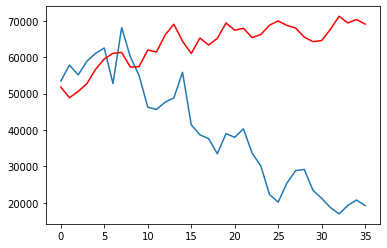

In [435]:
from statsmodels.tsa.ar_model import AutoReg
from sklearn.metrics import mean_squared_error
from math import sqrt

# split dataset
X = uk_newcase.values
train, val = X[1:len(X)-36], X[len(X)-36:]
# train autoregression
model = AutoReg(train, lags=36)
model_fit = model.fit()
print('Coefficients: %s' % model_fit.params)
# make predictions
predictions = model_fit.predict(start=len(train), end=len(train)+len(val)-1, dynamic=False)
for i in range(len(predictions)):
	print('predicted=%f, expected=%f' % (predictions[i], test[i]))
rmse = sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rmse)
# plot results
plt.plot(val)
plt.plot(predictions, color='red')
plt.show()

Feature engineering

In [436]:
# creating new dataframe from new_cases column
new_case = uk_newcase[['new_cases']]
# inserting new column with yesterday's new_cases values
new_case.loc[:,'yesterday'] = new_case.loc[:,'new_cases'].shift()
# inserting another column with difference between yesterday and day before yesterday's new_cases values.
new_case.loc[:,'yesterday_diff'] = new_case.loc[:,'yesterday'].diff()
# dropping NAs
new_case = new_case.dropna()
new_case

,new_cases,yesterday,yesterday_diff
date,,,
2020-02-02,0.0,0.0,-2.0
2020-02-03,6.0,0.0,0.0
2020-02-04,0.0,6.0,6.0
2020-02-05,1.0,0.0,-6.0
2020-02-06,0.0,1.0,1.0
...,...,...,...
2021-02-01,18668.0,21190.0,-2210.0
2021-02-02,16906.0,18668.0,-2522.0
2021-02-03,19215.0,16906.0,-1762.0


Defining training and validating datasets

In [437]:
X_train = new_case[:'2020'].drop(['new_cases'], axis = 1)
y_train = new_case.loc[:'2020', 'new_cases']
X_val = new_case['2021'].drop(['new_cases'], axis = 1)
y_val = new_case.loc['2021', 'new_cases']

In [438]:
X_train.shape, y_train.shape, X_val.shape, y_val.shape

((334, 2), (334,), (36, 2), (36,))

Define model

Linear Regression

In [439]:
from sklearn.linear_model import LinearRegression

model = LinearRegression().fit(X_train, y_train)
print(model.score(X_train, y_train))

0.9587618113064627


Predict on validation set

In [440]:
y_pred = model.predict(X_val)
y_pred = y_pred.astype(int)
print(model.score(X_val, y_val))

0.8588896180545486


In [441]:
from sklearn.metrics import mean_squared_error

rmse = mean_squared_error(y_val, y_pred, squared=False)
rmse

5703.269892984395

In [442]:
df = pd.DataFrame({'Actual': y_val, 'Predicted':y_pred})
df

,Actual,Predicted
date,,
2021-01-01,53458.0,56227
2021-01-02,57853.0,55014
2021-01-03,55157.0,58323
2021-01-04,58923.0,56768
2021-01-05,61087.0,59521
2021-01-06,62556.0,61998
2021-01-07,52787.0,63614
2021-01-08,68192.0,55542
2021-01-09,60098.0,67015


Graphics

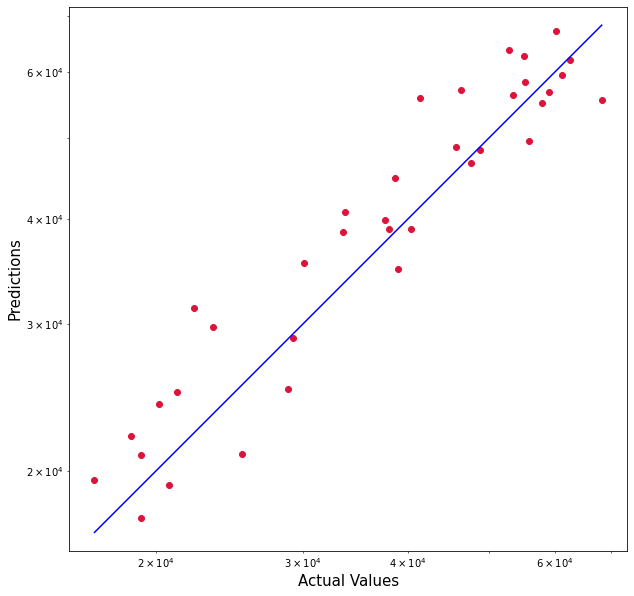

In [443]:
plt.figure(figsize=(10,10))
plt.scatter(y_val, y_pred, c='crimson')
plt.yscale('log')
plt.xscale('log')

p1 = max(max(y_pred), max(y_val))
p2 = min(min(y_pred), min(y_val))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('Actual Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.axis('equal')
plt.show()

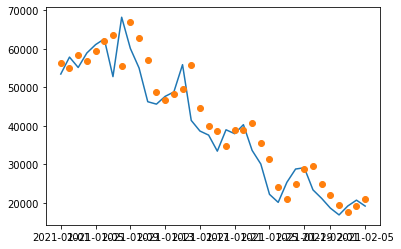

In [444]:
plt.plot(df.Actual)
plt.plot(df.Predicted, 'o')
plt.show()